<a href="https://colab.research.google.com/github/hyunsoojin/colab/blob/main/9_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [3]:
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42
)

In [4]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [5]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [6]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 13s 37ms/step - loss: 0.6924 - accuracy: 0.5371 - val_loss: 0.6917 - val_accuracy: 0.5620
Epoch 2/100
313/313 [==============================] - 11s 36ms/step - loss: 0.6899 - accuracy: 0.6004 - val_loss: 0.6881 - val_accuracy: 0.6092
Epoch 3/100
313/313 [==============================] - 11s 36ms/step - loss: 0.6828 - accuracy: 0.6461 - val_loss: 0.6759 - val_accuracy: 0.6738
Epoch 4/100
313/313 [==============================] - 11s 36ms/step - loss: 0.6469 - accuracy: 0.7005 - val_loss: 0.6087 - val_accuracy: 0.7246
Epoch 5/100
313/313 [==============================] - 11s 36ms/step - loss: 0.5886 - accuracy: 0.7327 - val_loss: 0.5775 - val_accuracy: 0.7296
Epoch 6/100
313/313 [==============================] - 11s 36ms/step - loss: 0.5606 - accuracy: 0.7487 - val_loss: 0.5529 - val_accuracy: 0.7484
Epoch 7/100
313/313 [==============================] - 11s 36ms/step - loss: 0.5345 - accuracy: 0.7639 - val_loss: 0.5315 - val_ac

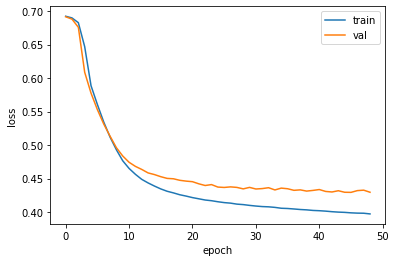

In [7]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [9]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [13]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 14s 38ms/step - loss: 0.6929 - accuracy: 0.5193 - val_loss: 0.6924 - val_accuracy: 0.5444
Epoch 2/100
313/313 [==============================] - 12s 39ms/step - loss: 0.6914 - accuracy: 0.5812 - val_loss: 0.6904 - val_accuracy: 0.5992
Epoch 3/100
313/313 [==============================] - 12s 38ms/step - loss: 0.6877 - accuracy: 0.6170 - val_loss: 0.6848 - val_accuracy: 0.6484
Epoch 4/100
313/313 [==============================] - 11s 37ms/step - loss: 0.6777 - accuracy: 0.6562 - val_loss: 0.6674 - val_accuracy: 0.6790
Epoch 5/100
313/313 [==============================] - 12s 38ms/step - loss: 0.6320 - accuracy: 0.7020 - val_loss: 0.5913 - val_accuracy: 0.7132
Epoch 6/100
313/313 [==============================] - 12s 37ms/step - loss: 0.5747 - accuracy: 0.7244 - val_loss: 0.5633 - val_accuracy: 0.7338
Epoch 7/100
313/313 [==============================] - 12s 38ms/step - loss: 0.5496 - accuracy: 0.7444 - val_loss: 0.5407 - val_ac

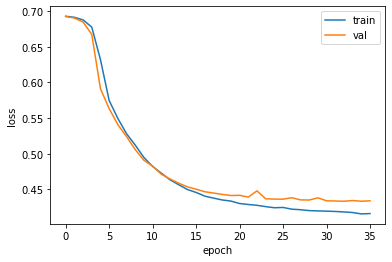

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [16]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

In [17]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 8)            800       
_________________________________________________________________
lstm_3 (LSTM)                (None, 8)                 544       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [18]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model3.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 26s 73ms/step - loss: 0.6922 - accuracy: 0.5360 - val_loss: 0.6906 - val_accuracy: 0.5922
Epoch 2/100
313/313 [==============================] - 22s 70ms/step - loss: 0.6864 - accuracy: 0.5955 - val_loss: 0.6769 - val_accuracy: 0.6402
Epoch 3/100
313/313 [==============================] - 22s 72ms/step - loss: 0.6496 - accuracy: 0.6628 - val_loss: 0.6095 - val_accuracy: 0.7000
Epoch 4/100
313/313 [==============================] - 23s 73ms/step - loss: 0.5855 - accuracy: 0.7156 - val_loss: 0.5571 - val_accuracy: 0.7334
Epoch 5/100
313/313 [==============================] - 22s 72ms/step - loss: 0.5501 - accuracy: 0.7368 - val_loss: 0.5314 - val_accuracy: 0.7464
Epoch 6/100
313/313 [==============================] - 23s 72ms/step - loss: 0.5269 - accuracy: 0.7502 - val_loss: 0.5177 - val_accuracy: 0.7536
Epoch 7/100
313/313 [==============================] - 23s 72ms/step - loss: 0.5091 - accuracy: 0.7641 - val_loss: 0.5004 - val_ac

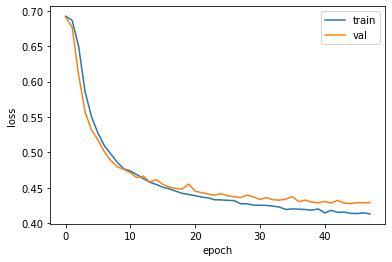

In [19]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [20]:
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

In [21]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model4.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 14s 40ms/step - loss: 0.6925 - accuracy: 0.5229 - val_loss: 0.6917 - val_accuracy: 0.5640
Epoch 2/100
313/313 [==============================] - 12s 39ms/step - loss: 0.6902 - accuracy: 0.5859 - val_loss: 0.6890 - val_accuracy: 0.5978
Epoch 3/100
313/313 [==============================] - 13s 40ms/step - loss: 0.6863 - accuracy: 0.6089 - val_loss: 0.6840 - val_accuracy: 0.6128
Epoch 4/100
313/313 [==============================] - 12s 40ms/step - loss: 0.6790 - accuracy: 0.6328 - val_loss: 0.6749 - val_accuracy: 0.6282
Epoch 5/100
313/313 [==============================] - 12s 40ms/step - loss: 0.6649 - accuracy: 0.6532 - val_loss: 0.6568 - val_accuracy: 0.6532
Epoch 6/100
313/313 [==============================] - 12s 40ms/step - loss: 0.6339 - accuracy: 0.6734 - val_loss: 0.6140 - val_accuracy: 0.6772
Epoch 7/100
313/313 [==============================] - 12s 40ms/step - loss: 0.5775 - accuracy: 0.7132 - val_loss: 0.5610 - val_ac

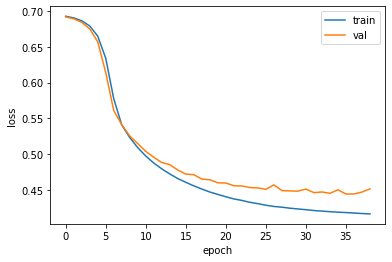

In [22]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()